# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 2

### Problem 1a:   
Write a script to convert declination, inclination, intensity data to North, East and Down.  First we need to import numpy, the module with lots of math functions and pandas with nice data manipulation functions

In [1]:
import numpy as np
import pandas as pd


Let's write a little function to do the conversion.  

In [2]:
def dir2cart(data):
    """ Converts data array with [Declination, Inclination, Intensity] 
        to cartesian coordinates, X=North, Y=East, Z=Down
        Returns array with [X,Y,Z]
    """
    # convert degrees to radians for declination and inclination
    decs,incs,ints=np.radians(data[0]),np.radians(data[1]),data[2]
    X=ints*np.cos(decs)*np.cos(incs)
    Y=ints*np.sin(decs)*np.cos(incs)
    Z=ints*np.sin(incs)
    cart=np.array([X,Y,Z]).transpose()
    return cart

Now let's read in a data file with some geomagnetic field vectors in it.

In [5]:
# read in the data and transpose it to rows of dec, inc, int
data=np.loadtxt('ps2_prob1_data.txt').transpose()
print (dir2cart(data))

[[ 21352.55524831   2093.63634727  23332.08409238]
 [  4504.44337072   -259.7245706   -1225.86288284]
 [ 23546.1300489    3141.72451736  33426.255268  ]
 [ 14629.0911691    1022.96570709  21021.51776849]
 [ 23150.99484809   2965.71083857  30861.24994328]
 [ 14767.09147922   2127.97038951    651.40495181]
 [ 18929.94924879   -231.28446662  25961.37752135]
 [  8342.98700429    759.27129675   8495.26107758]
 [ 10858.76521357   2606.95887762  19818.79867013]
 [ 30243.76260383   1532.08292009  41375.84902637]]


### Problem 1b: 
Get locations from 10 random spots on Earth and calculate the IGRF vectors at each place. 

You will have to install the  **PmagPy** before you can use the functions in it.  If you haven't done so, go to http://earthref.org/PmagPy/cookbook and follow the directions for installing **PmagPy**.  

To solve this problem,  we have to understand how the function **pmag.get_unf( )** works.  To do this, we need to tell the notebook where the **pmag** module lives, import it and print out the doc string for **get_unf()**: 

In [9]:
import pmagpy.pmag as pmag
help(pmag.get_unf)

Help on function get_unf in module pmagpy.pmag:

get_unf(N)
       Called with get_unf(N).
    subroutine to retrieve N uniformly distributed directions
    using the way described in Fisher et al. (1987).



Now we can use that function to generate a list of random points on the Earth's surface.  

In [10]:
places=pmag.get_unf(10)
print (places)

[[ 296.57060058  -14.94521803]
 [ 278.91278455  -24.04744891]
 [  10.26012821    9.85242659]
 [ 340.0306994   -15.04575254]
 [   7.47993058  -45.38441136]
 [  26.6712868    30.30049264]
 [  70.97414861  -26.01522427]
 [ 187.06382799    6.31509525]
 [  11.32247157   46.14552109]
 [  97.52176299   27.90784045]]


Now let's find out about ipmag.igrf

In [15]:
import pmagpy.ipmag as ipmag
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list)
    Determine Declination, Inclination, Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (A.D.)
    
    Returns
    -------
    igrf_array : array of IGRF values (0: dec; 1: inc; 2: intensity)
    
    Examples
    --------
    >>> local_field = ipmag.igrf([2013.6544, .052, 37.87, -122.27])
    >>> local_field
    array([  1.39489916e+01,   6.13532008e+01,   4.87452644e+04])
    >>> ipmag.igrf_print(local_field)
    Declination: 13.949
    Inclination: 61.353
    Intensity: 48745.264 nT



And now we can ship the **data** in places to **ipmag.igrf**.

In [16]:
for place in places:
    print (ipmag.igrf([2006,0,place[1],place[0]]))

[  3.49921916e+02  -7.81155910e+00   2.39418114e+04]
[  6.95620500e+00  -2.16268774e+01   2.56134912e+04]
[  3.58723031e+02  -3.57963105e+00   3.38109152e+04]
[   337.56950358    -47.06525107  26704.78986928]
[   335.54059189    -63.05290002  25419.99777109]
[  3.03319257e+00   4.39150754e+01   4.28216786e+04]
[   335.55781848    -60.35928881  45184.44235406]
[  9.20891911e+00   1.04251638e+01   3.28392782e+04]
[  1.58268422e+00   6.23155673e+01   4.73911274e+04]
[  3.59352466e+02   4.23794283e+01   4.86811775e+04]


## Problem 1c:  
Take the output from Problem 1b and call **dir2cart**. 

In [17]:
data=[] # make a blank list
for place in places:
    Dir=ipmag.igrf([2006,0,place[1],place[0]])
    data.append(Dir) # append to the data list
data=np.array(data).transpose() # dir2cart takes arrays of data
print (dir2cart(data))

[[ 23353.65224173  -4150.70340909  -3254.06200286]
 [ 23635.12808511   2883.69226803  -9440.12543869]
 [ 33736.56910851   -752.02173478  -2111.00856315]
 [ 16814.14129487  -6940.76117017 -19551.37562571]
 [ 10485.69958419  -4769.63993749 -22660.02925371]
 [ 30804.17871908   1632.27362316  29700.74765865]
 [ 20343.69760027  -9246.37557523 -39271.77532934]
 [ 31880.90405437   5168.67287308   5942.30365612]
 [ 22009.58755495    608.12663241  41965.78594192]
 [ 35958.36254652   -406.40446061  32812.92489956]]


## Problem 2: 

Take the output from Problem 1c and plot as an equal area projection (first by hand and then with **ipmag** functions).  The **ipmag** functions call **pmagplotlib** and use **matplotlib**, so these will have to be imported as well. 

In [21]:
import pmagpy.pmagplotlib as pmagplotlib
import matplotlib.pyplot as plt
# this 'magic command' (starts with %) let's us plot things in the notebook
%matplotlib inline 

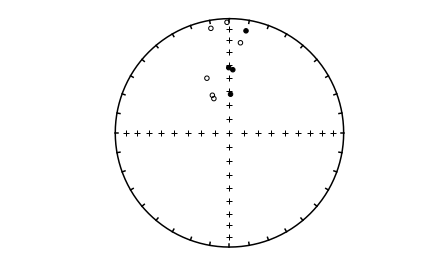

In [22]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(data[0],data[1]) # put on the dots

### Problem 3: 
Use the dipole formula ($\tan (I) = 2 \tan (\lambda)$ where $I$ is inclination and $\lambda$ is latitude and calculate the GAD field at 36 $^{\circ}$N.  Note that declination is always zero for a GAD field.  We can make a **lambda** function for this!

In [25]:
lat = np.radians(36.) # remember to convert to radians!
inc = lambda lat: np.degrees(np.arctan(2.*np.tan(lat)))  # and back! 
print ('%7.1f'%(inc(lat))) # and print it out

   55.5


Let's use the pmag function **dia_vgp**.  First let's figure out what it does:

In [26]:
help(pmag.dia_vgp)

Help on function dia_vgp in module pmagpy.pmag:

dia_vgp(*args)
    Converts directional data (declination, inclination, alpha95) at a given
    location (Site latitude, Site longitude) to pole position (pole longitude,
    pole latitude, dp, dm)
    
    Parameters
    ----------
    Takes input as (Dec, Inc, a95, Site latitude, Site longitude)
    Input can be as individual values (5 parameters)
    or
    as a list of lists: [[Dec, Inc, a95, lat, lon],[Dec, Inc, a95, lat, lon]]
    
    Returns
    ----------
    if input is individual values for one pole the return is:
    pole longitude, pole latitude, dp, dm
    
    if input is list of lists the return is:
    list of pole longitudes, list of pole latitude, list of dp, list of dm



Now we can use it to convert our directions to VGPs. Note that alpha95 is require but is not given here so we supply a zero in its place. Note also that westward longitudes are indicated by minus signs

In [27]:
vgp_lat,vgp_lon,dp,dp= pmag.dia_vgp(345,47,0.,36,-112) 
print ('%7.1f %7.1f'%(vgp_lat,vgp_lon))

  130.6    75.1
